In [ ]:
import pandas as pd
import os # Go

!wget -q --show-progress "https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%201%20-%205/Session%202a%20-%20Linear%20Regression/car_dekho.csv"

import warnings
warnings.filterwarnings("ignore")

car_dekho.csv.5     100%[===================>]  13.91K  --.-KB/s    in 0s      


In [ ]:
data_path  = 'car_dekho.csv'
car_data = pd.read_csv(data_path)

In [ ]:
 car_data.head()

,Car_Name,Age,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission
0,ritz,5,3.35,27000,Petrol,Dealer,Manual
1,sx4,6,4.75,43000,Diesel,Dealer,Manual
2,ciaz,2,7.25,6900,Petrol,Dealer,Manual
3,wagon r,8,2.85,5200,Petrol,Dealer,Manual
4,swift,5,4.60,42450,Diesel,Dealer,Manual


In [ ]:
car_data[['Fuel_Type']].head()

,Fuel_Type
0,Petrol
1,Diesel
2,Petrol
3,Petrol
4,Diesel


In [ ]:
car_data[['Car_Name']].head()

,Car_Name
0,ritz
1,sx4
2,ciaz
3,wagon r
4,swift


In [ ]:
print(len(car_data))

301


<Axes: xlabel='Age', ylabel='Selling_Price'>

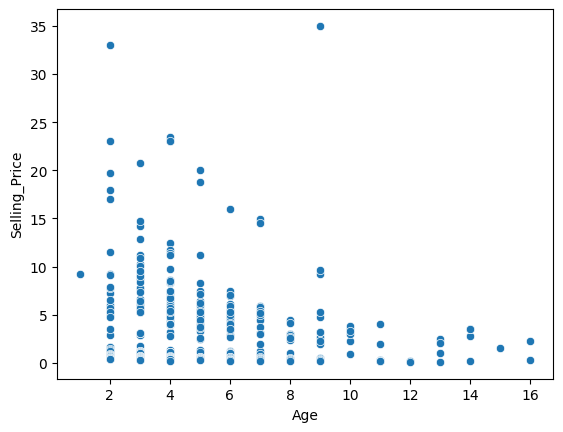

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x = 'Age', y = 'Selling_Price', data = car_data)

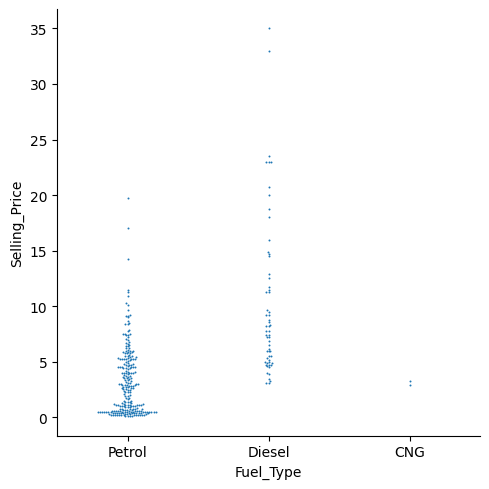

In [ ]:
sns.catplot(x = 'Fuel_Type', y = 'Selling_Price', data = car_data, kind = 'swarm', s = 2)

In [ ]:
car_data.groupby(['Fuel_Type']).count()

,Car_Name,Age,Selling_Price,Kms_Driven,Seller_Type,Transmission
Fuel_Type,,,,,,
CNG,2,2,2,2,2,2
Diesel,60,60,60,60,60,60
Petrol,239,239,239,239,239,239


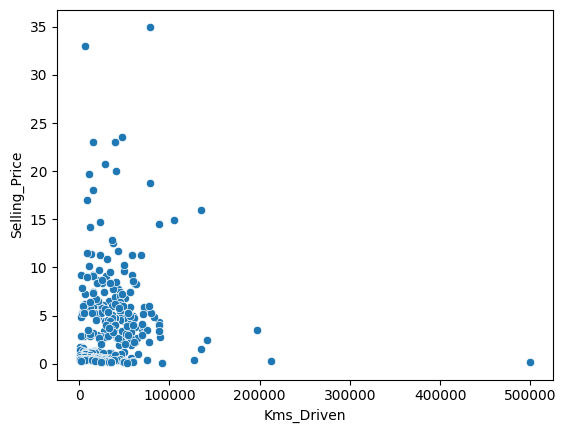

In [ ]:
sns.scatterplot(x = 'Kms_Driven', y = 'Selling_Price', data = car_data);

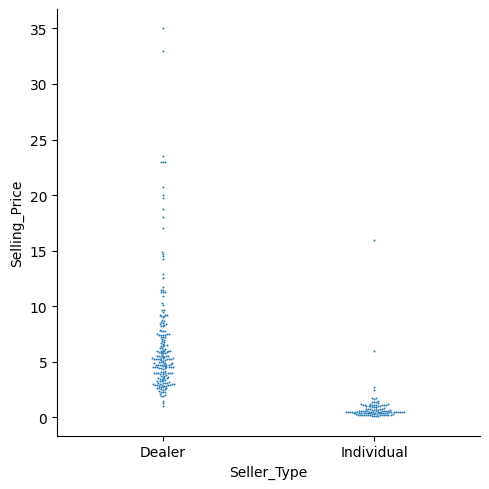

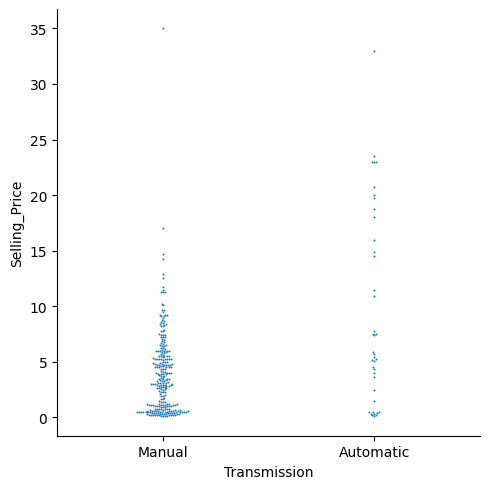

In [ ]:
sns.catplot(x = 'Seller_Type', y = 'Selling_Price', data = car_data, kind = 'swarm', s = 2)
sns.catplot(x = 'Transmission', y = 'Selling_Price', data = car_data, kind = 'swarm', s = 2)

In [ ]:
import sklearn
from sklearn.linear_model import LinearRegression
import numpy as np

X = car_data[['Age']]
y = car_data[['Selling_Price']]

In [ ]:
print(X)

     Age
0      5
1      6
2      2
3      8
4      5
..   ...
296    3
297    4
298   10
299    2
300    3

[301 rows x 1 columns]


In [ ]:
print(y)

     Selling_Price
0             3.35
1             4.75
2             7.25
3             2.85
4             4.60
..             ...
296           9.50
297           4.00
298           3.35
299          11.50
300           5.30

[301 rows x 1 columns]


In [ ]:
linear = LinearRegression()

linear.fit(X, y)

LinearRegression()

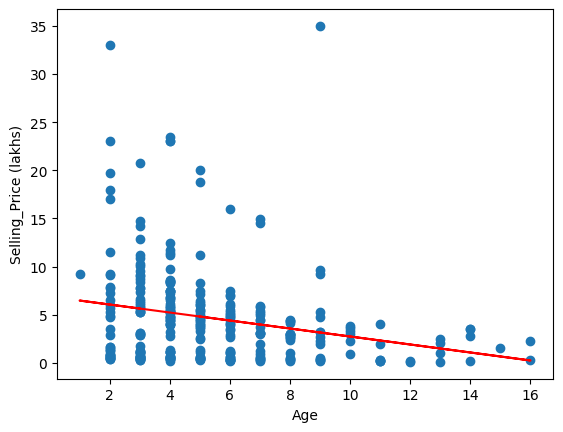

In [ ]:
import matplotlib.pyplot as plt

y_pred = linear.predict(X)
plt.plot(X, y_pred, color='red')

plt.scatter(X, y)
plt.xlabel('Age')
plt.ylabel('Selling_Price (lakhs)')
plt.show()

In [ ]:
print('Our m in lakhs/year: ', linear.coef_)

Our m in lakhs/year:  [[-0.41509169]]


In [ ]:
print('Our intercept b: ', linear.intercept_)

Our intercept b:  [6.89120688]


In [ ]:
print('Our equation is Price = -0.42 lakhs/year * age + 6.89 lakhs')
print('Therefore, our fair price is %0.2f lakhs'%(-0.42*6.0+6.89))

Our equation is Price = -0.42 lakhs/year * age + 6.89 lakhs
Therefore, our fair price is 4.37 lakhs


In [ ]:
car_data['TransmissionNumber'] = car_data['Transmission'].replace({'Manual':1, 'Automatic':0})

In [ ]:
car_data.head(20)

,Car_Name,Age,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,TransmissionNumber
0,ritz,5,3.35,27000,Petrol,Dealer,Manual,1
1,sx4,6,4.75,43000,Diesel,Dealer,Manual,1
2,ciaz,2,7.25,6900,Petrol,Dealer,Manual,1
3,wagon r,8,2.85,5200,Petrol,Dealer,Manual,1
4,swift,5,4.60,42450,Diesel,Dealer,Manual,1
5,vitara brezza,1,9.25,2071,Diesel,Dealer,Manual,1
6,ciaz,4,6.75,18796,Petrol,Dealer,Manual,1
7,s cross,4,6.50,33429,Diesel,Dealer,Manual,1
8,ciaz,3,8.75,20273,Diesel,Dealer,Manual,1
9,ciaz,4,7.45,42367,Diesel,Dealer,Manual,1


In [ ]:
X_column = 'Age'
X = car_data[[X_column]]
y = car_data[['Selling_Price']]

linear = LinearRegression()

linear.fit(X,y)

LinearRegression()

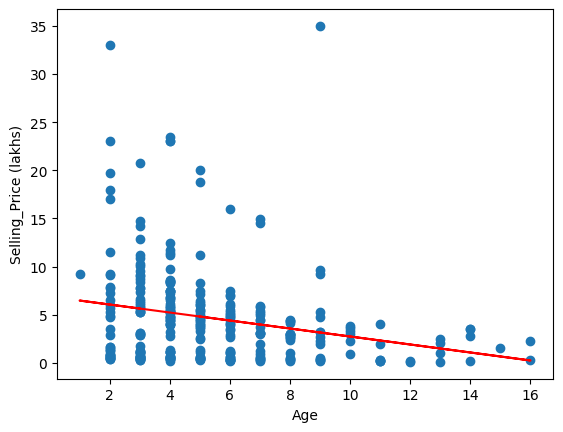

In [ ]:
import matplotlib.pyplot as plt

y_pred = linear.predict(X)
plt.plot(X, y_pred, color='red')

plt.scatter(X, y)
plt.xlabel(X_column)
plt.ylabel('Selling_Price (lakhs)')
plt.show()

In [ ]:
X = car_data[['Age', 'TransmissionNumber', 'Kms_Driven']]

multiple = LinearRegression(fit_intercept = True)

multiple.fit(X, y)

LinearRegression()

In [ ]:
print('Our single linear model had an R^2 of: %0.3f'%linear.score(car_data[[X_column]], y))

Our single linear model had an R^2 of: 0.056


In [ ]:
print('Our multiple linear model had an R^2 of: %0.3f'%multiple.score(X, y))

Our multiple linear model had an R^2 of: 0.203


In [ ]:
car_data['SellerNumber'] = car_data['Seller_Type'].replace({'Dealer':1, 'Individual':0})

X = car_data[['Age', 'TransmissionNumber', 'Kms_Driven', 'SellerNumber']].values
print(X.shape)

multiple = LinearRegression(fit_intercept = True)

multiple.fit(X, y)

print('Our multiple linear model had an R^2 of: %0.3f'%multiple.score(X, y))

(301, 4)
Our multiple linear model had an R^2 of: 0.462


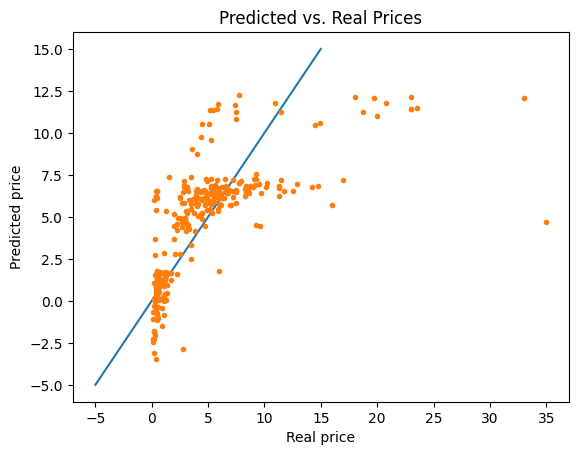

In [ ]:
plt.plot([-5,15],[-5,15])
plt.title("Predicted vs. Real Prices")
plt.xlabel("Real price")
plt.ylabel("Predicted price")
prediction = multiple.predict(X)
plt.plot(y, prediction, '.')
plt.show()

In [ ]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

car_data['Prediction'] = prediction
print (car_data)

    Car_Name  Age  Selling_Price  Kms_Driven Fuel_Type Seller_Type Transmission  TransmissionNumber  SellerNumber  Prediction
0       ritz    5           3.35       27000    Petrol      Dealer       Manual                   1             1    6.032870
1        sx4    6           4.75       43000    Diesel      Dealer       Manual                   1             1    5.713381
2       ciaz    2           7.25        6900    Petrol      Dealer       Manual                   1             1    7.177459
3    wagon r    8           2.85        5200    Petrol      Dealer       Manual                   1             1    4.608766
4      swift    5           4.60       42450    Diesel      Dealer       Manual                   1             1    6.135938
..       ...  ...            ...         ...       ...         ...          ...                 ...           ...         ...
296     city    3           9.50       33988    Diesel      Dealer       Manual                   1             1    6

In [ ]:
car_data['deal_score'] = car_data['Prediction']-car_data['Selling_Price']
print (car_data)

    Car_Name  Age  Selling_Price  Kms_Driven Fuel_Type Seller_Type Transmission  TransmissionNumber  SellerNumber  Prediction  deal_score
0       ritz    5           3.35       27000    Petrol      Dealer       Manual                   1             1    6.032870    2.682870
1        sx4    6           4.75       43000    Diesel      Dealer       Manual                   1             1    5.713381    0.963381
2       ciaz    2           7.25        6900    Petrol      Dealer       Manual                   1             1    7.177459   -0.072541
3    wagon r    8           2.85        5200    Petrol      Dealer       Manual                   1             1    4.608766    1.758766
4      swift    5           4.60       42450    Diesel      Dealer       Manual                   1             1    6.135938    1.535938
..       ...  ...            ...         ...       ...         ...          ...                 ...           ...         ...         ...
296     city    3           9.50  

In [ ]:
sorted_data = car_data.sort_values("deal_score")
best_deals = sorted_data.tail(10)
most_overpriced = sorted_data.head(10)
print (best_deals)
print (most_overpriced)

             Car_Name  Age  Selling_Price  Kms_Driven Fuel_Type Seller_Type Transmission  TransmissionNumber  SellerNumber  Prediction  deal_score
196         Activa 3g   11           0.17      500000    Petrol  Individual    Automatic                   0             0    6.035551    5.865551
77            corolla   15           1.50      135154    Petrol      Dealer    Automatic                   0             1    7.370486    5.870486
40             baleno    3           5.85       24524    Petrol      Dealer    Automatic                   0             1   11.747177    5.897177
177  Honda Activa 125    3           0.35       24000    Petrol  Individual    Automatic                   0             0    6.269951    5.919951
252              brio    4           5.40       31427    Petrol      Dealer    Automatic                   0             1   11.367002    5.967002
221               i20    6           4.50       32000    Petrol      Dealer    Automatic                   0          

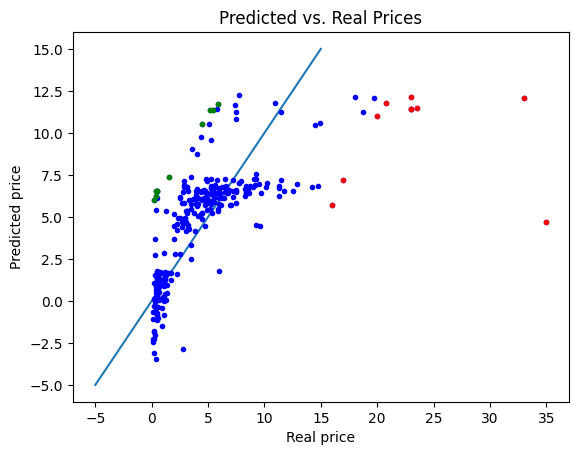

In [ ]:
plt.plot([-5,15],[-5,15])
plt.title("Predicted vs. Real Prices")
plt.xlabel("Real price")
plt.ylabel("Predicted price")
plt.plot(car_data.Selling_Price,car_data.Prediction,'b.')
plt.plot(best_deals.Selling_Price,best_deals.Prediction,'g.')
plt.plot(most_overpriced.Selling_Price,most_overpriced.Prediction,'r.')
plt.show()